Name: Aman Agarwal<br/>
Student ID: 1161131<br/>
Submission Details:<br/>
Course: Numerical Hydrodynamics (PHYS 7900)<br/>
Instructor: Dr. Daniel Siegel<br/>
Github link for the submission:
https://github.com/aman2010ag/Computational_Fluid_Dynamics_course_home_work/blob/main/CFD_problem_Set5.ipynb<br/>

Ans 1a) Following the algorithm discussed in the class, first we will find the primitive variables($v_*, p_*$) solutions around the contact discontinuity for Test 1. For that we need to apply the Newton Raphson scheme. 

In [205]:
#Declaring the global variables
global w_l=[1.0,0.0,1.0]
global w_r=[0.125,0.0,0.1]
global Gamma=1.4
global rho_l=w_l[1]
global v_l=w_l[2]
global p_l=w_l[3]
global rho_r=w_r[1]
global v_r=w_r[2]
global p_r=w_r[3]
global c_l=(Gamma*p_l/rho_l)^(0.5)
global c_r=(Gamma*p_r/rho_r)^(0.5)
global A_l=2/((Gamma+1)*rho_l)
global B_l=((Gamma-1)*p_l)/(Gamma+1)
global A_r=2/((Gamma+1)*rho_r)
global B_r=((Gamma-1)*p_r)/(Gamma+1)

p_star_guess= 0.5*(p_l+p_r)
print("The p_star guess for Test 1 is ",p_star_guess)

The p_star guess for Test 1 is 0.55

In [206]:
#Functions for NR scheme
function f_left(p)
    if p> p_l
        return (p-p_l)*(A_l/(p+B_l))^(0.5)
    else
        return (2*c_l/(Gamma-1))*((p/p_l)^((Gamma-1)/(2*Gamma))-1)
    end
end
    
    
function f_right(p)
    if p> p_r
        return (p-p_r)*(A_r/(p+B_r))^(0.5)
    else
        return (2*c_r/(Gamma-1))*((p/p_r)^((Gamma-1)/(2*Gamma))-1)
    end
end
        
function f_left_prime(p)
    if p> p_l
        return (A_l/(p+B_l))^(0.5)-(p-p_l)*(0.5*((A_l^(0.5))/((p+B_l)^(1.5))))
    else
        return (2*c_l/(Gamma-1))*((Gamma-1)/(2*Gamma))*(((p/p_l)^((Gamma-2)/(2*Gamma))/p_l))
    end
end

function f_right_prime(p)
    if p> p_r
        return (A_r/(p+B_r))^(0.5)-(p-p_r)*(0.5*((A_r^(0.5))/((p+B_r)^(1.5))))
    else
        return (2*c_r/(Gamma-1))*((Gamma-1)/(2*Gamma))*(((p/p_r)^((Gamma-2)/(2*Gamma))/p_r))
    end
end

function f_total(p)
    return f_left(p)+f_right(p)+v_r-v_l
end

function f_prime_total(p)
    return f_left_prime(p) + f_right_prime(p)
end

f_prime_total (generic function with 1 method)

In [207]:
#Newton_Raphson_scheme
function NR_p_star(p_guess)
    p_next=p_guess+1
    Error=abs(p_next-p_guess)
    while Error>=1*10^(-6)
        p_next= p_guess-0.01*f_total(p_guess)/f_prime_total(p_guess)
        Error=abs(p_next-p_guess)
        p_guess=p_next
    end
    return p_guess
end

NR_p_star (generic function with 1 method)

In [208]:
#function to find u_star
function v_star(p_star_output)
    return 0.5*(v_l+v_r)+0.5*(f_right(p_star_output)-f_left(p_star_output))
end

v_star (generic function with 1 method)

In [209]:
#calculating p_star and v_star
p_star_output=NR_p_star(p_star_guess)
v_star_output=u_star(p_star_output)
println("The calculated p_star for Test 1 is ",p_star_output)
println("The calculated u_star for Test 1 is ",u_star_output)

The calculated p_star for Test 1 is 0.3032054705763649
The calculated u_star for Test 1 is 0.927481408191954


We calculated the $(v_*, p_*)$ above. These variables do not vary across the contact discontinuity. $\rho$ variable varies across the contact discontinuity, hence we need to find $\rho_{*l}$ and $\rho_{*r}$ and define the solution. After the solution is defined, for a fixed time t, we will find the variable profiles by sampling the solution 

In [210]:
#Two left case solutions of the Riemann problem
function left_shock(p_star_output,v_star_output,x,t)
    shock_speed_l= v_l-c_l*(((Gamma+1)/(2*Gamma))*(p_star_output/p_l)+(Gamma-1)/(2*Gamma))^(0.5)
    if x/t>= shock_speed_l && x/t <= v_star_output
        rho_star_l= rho_l*((p_star_output/p_l)+((Gamma-1)/(Gamma+1)))/(((Gamma-1)/(Gamma*1))*(p_star_output/p_l)+1)
        return [rho_star_l,v_star_output,p_star_output]
    elseif x/t<= shock_speed_l
        return [rho_l,v_l,p_l]
    else
        return[0.0,0.0,0.0]
    end
end

function left_rarefaction_wave(p_star_output,v_star_output,x,t)
    S_Hl= v_l-c_l
    S_Tl= v_star_output- c_l*(p_star_output/p_l)^((Gamma-1)/(2*Gamma))
    if x/t <= S_Hl
        return [rho_l,v_l,p_l]
    elseif x/t>= S_Hl && x/t <= S_Tl
        rho_fan= rho_l*((2/(Gamma+1))+((Gamma-1)/((Gamma+1)*c_l))*(v_l - x/t))^(2/(Gamma-1))
        v_fan= (2/(Gamma+1))*(c_l + (Gamma-1)*v_l/2 + x/t)
        p_fan= p_l*(2/(Gamma+1)+(Gamma-1)*(v_l-x/t)/((Gamma+1)*c_l))^(2*Gamma/(Gamma-1))
        return [rho_fan, v_fan, p_fan]
    elseif x/t<=v_star_output && x/t>=S_Tl
        rho_star_l= rho_l*(p_star_output/p_l)^(1/Gamma)
        return [rho_star_l, v_star_output, p_star_output]
    else
        return [0.0,0.0,0.0]
    end
end

left_rarefaction_wave (generic function with 1 method)

In [211]:
#Two right case solutions of the Riemann problem
function right_shock(p_star_output,v_star_output,x,t)
    shock_speed_r= v_r+c_r*(((Gamma+1)/(2*Gamma))*(p_star_output/p_r)+(Gamma-1)/(2*Gamma))^(0.5)
    if x/t<= shock_speed_r && x/t >= v_star_output
        rho_star_r= rho_r*((p_star_output/p_r)+((Gamma-1)/(Gamma+1)))/(((Gamma-1)/(Gamma*1))*(p_star_output/p_r)+1)
        return [rho_star_r,v_star_output,p_star_output]
    elseif x/t>= shock_speed_r
        return [rho_r,v_r,p_r]
    else
        return [0.0,0.0,0.0]
    end
end

function right_rarefaction_wave(p_star_output,v_star_output,x,t)
    S_Hr= v_r+c_r
    S_Tr= v_star_output+ c_r*(p_star_output/p_r)^((Gamma-1)/(2*Gamma))
    if x/t >= S_Hr
        return [rho_r,v_r,p_r]
    elseif x/t>= S_Tr && x/t<= S_Hr
        rho_fan= rho_r*((2/(Gamma+1))-((Gamma-1)/((Gamma+1)*c_r))*(v_r - x/t))^(2/(Gamma-1))
        v_fan= (2/(Gamma+1))*(-c_r + (Gamma-1)*v_r/2 + x/t)
        p_fan= p_r*(2/(Gamma+1)-(Gamma-1)*(v_r-x/t)/((Gamma+1)*c_r))^(2*Gamma/(Gamma-1))
        return [rho_fan, v_fan, p_fan]
    elseif x/t>=v_star_output && x/t<=S_Tr
        rho_star_r= rho_r*(p_star_output/p_r)^(1/Gamma)
        return [rho_star_r, v_star_output, p_star_output]
    else
        return [0.0,0.0,0.0]
    end
end

right_rarefaction_wave (generic function with 1 method)

Since $p_*$=0.303<$p_l=1$ and $p_*=0.303$>$p_r=0.1$ we have left refraction wave and right shock 

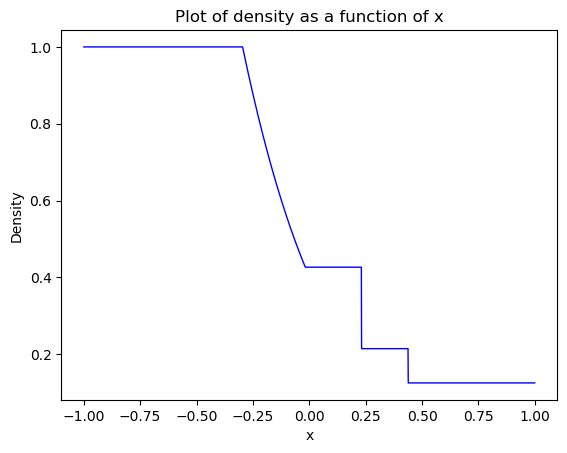

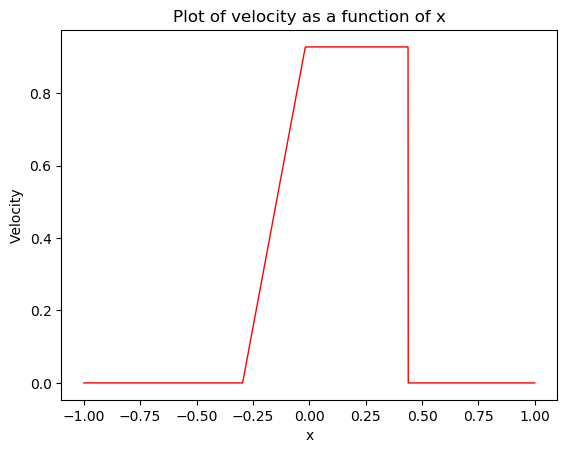

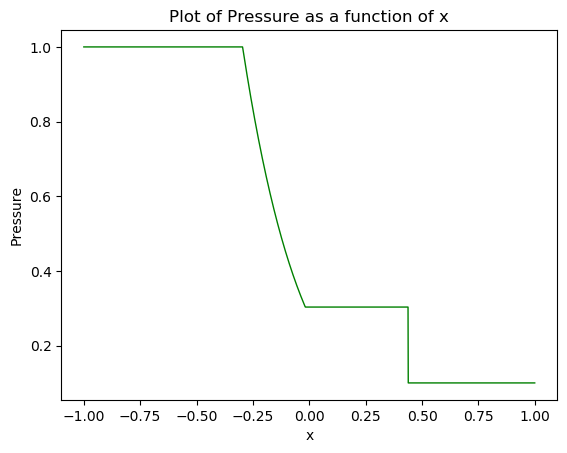

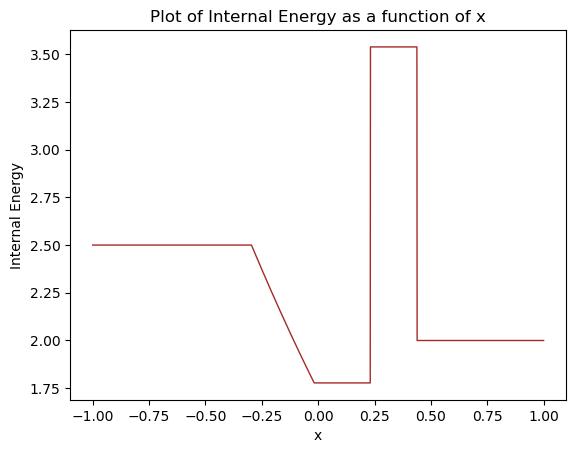

In [214]:
#Defining the grid and sampling the solutions at t=0.25
x_grid= -1:0.001:1
time_taken=0.25
rho_grid=zeros(length(x_grid))
v_grid=zeros(length(x_grid))
p_grid=zeros(length(x_grid))
e_grid=zeros(length(x_grid))

for it in 1:length(x_grid)
    rho_grid[it],v_grid[it],p_grid[it]= left_rarefaction_wave(p_star_output, v_star_output, x_grid[it],time_taken) +right_shock(p_star_output, v_star_output, x_grid[it],time_taken)
end
@. e_grid= p_grid/((Gamma-1)*rho_grid)
using PyPlot

 plt.figure(1)    
    plt.plot(x_grid, rho_grid, color="blue", linewidth=1)
    title("Plot of density as a function of x")
    xlabel("x")
    ylabel("Density")
    plt.show()


 plt.figure(2)    
    plt.plot(x_grid, v_grid, color="red", linewidth=1)
    title("Plot of velocity as a function of x")
    xlabel("x")
    ylabel("Velocity")
    plt.show()


 plt.figure(3)    
    plt.plot(x_grid, p_grid, color="green", linewidth=1)
    title("Plot of Pressure as a function of x")
    xlabel("x")
    ylabel("Pressure")
    plt.show()


 plt.figure(4)    
    plt.plot(x_grid, e_grid, color="brown", linewidth=1)
    title("Plot of Internal Energy as a function of x")
    xlabel("x")
    ylabel("Internal Energy")
    plt.show()

Above plots show the variation of density, pressure, velocity and internal energy as a function of x. The behavior of the plots look as expected. We expect all the variables to smoothly vary across the rarefaction wave and have an abrupt change in value across the shock and that is observed. In the intermediate star region we expect the velocity and pressure to remain constant as they are Riemann Invariants but the density can change value and the internal energy which depends on density also can change value. These trends are also observed as expected

Ans 1b) Following the algorithm discussed in the class, first we will find the primitive variables($v_*, p_*$) solutions around the contact discontinuity for Test 2. For that we need to apply the Newton Raphson scheme.

In [184]:
#Declaring the global variables
global w_l=[1.0,-2.0,0.4]
global w_r=[1.0,2.0,0.4]
global Gamma=1.4
global rho_l=w_l[1]
global v_l=w_l[2]
global p_l=w_l[3]
global rho_r=w_r[1]
global v_r=w_r[2]
global p_r=w_r[3]
global c_l=(Gamma*p_l/rho_l)^(0.5)
global c_r=(Gamma*p_r/rho_r)^(0.5)
global A_l=2/((Gamma+1)*rho_l)
global B_l=((Gamma-1)*p_l)/(Gamma+1)
global A_r=2/((Gamma+1)*rho_r)
global B_r=((Gamma-1)*p_r)/(Gamma+1)

p_star_guess= 0.5*(p_l+p_r)
print("The p_star guess for Test 2 is ",p_star_guess)

The p_star guess for Test 2 is 0.4

In [185]:
#calculating p_star and v_star
p_star_output=NR_p_star(p_star_guess)
v_star_output=u_star(p_star_output)
println("The calculated p_star for Test 2 is ",p_star_output)
println("The calculated u_star for Test 2 is ",v_star_output)

The calculated p_star for Test 2 is 0.0018957953754854106
The calculated u_star for Test 2 is 0.0


Since $p_*$=0.00189<$p_l=0.4$ and $p_*=0.00189$<$p_l=0.4$ we have two refraction wave solution

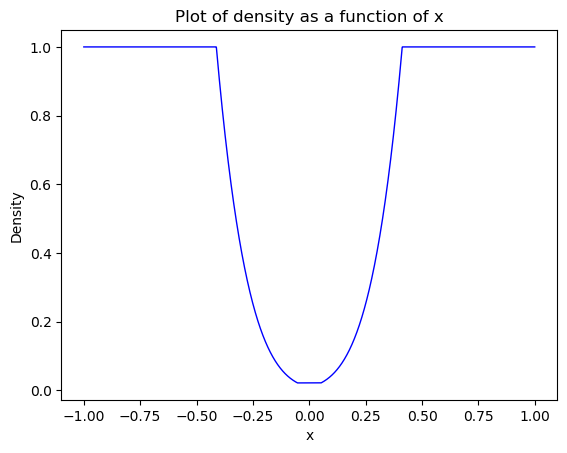

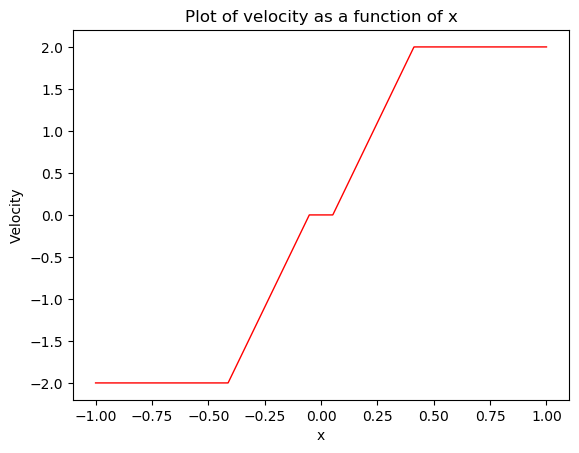

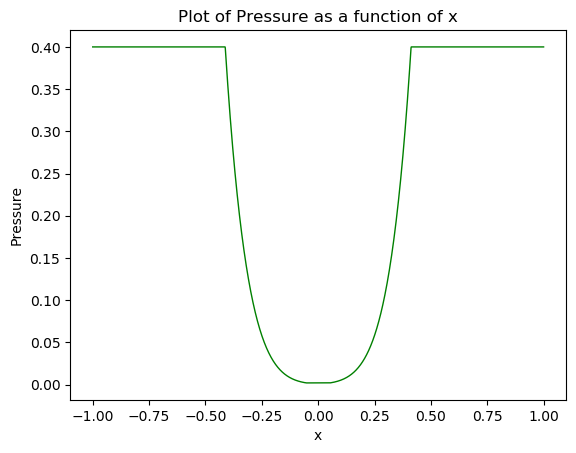

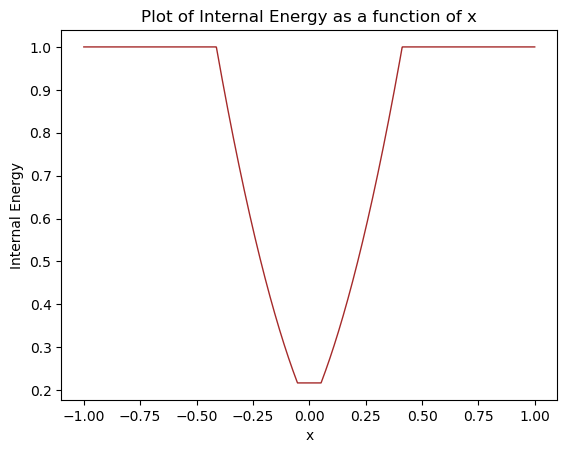

In [204]:
#Defining the grid and sampling the solutions at t=0.15
x_grid= -1:0.001:1
time_taken=0.15
rho_grid=zeros(length(x_grid))
v_grid=zeros(length(x_grid))
p_grid=zeros(length(x_grid))
e_grid=zeros(length(x_grid))

for it in 1:length(x_grid)
    rho_grid[it],v_grid[it],p_grid[it]= right_rarefaction_wave(p_star_output, v_star_output, x_grid[it],time_taken) + left_rarefaction_wave(p_star_output, v_star_output, x_grid[it],time_taken)
end
rho_grid[convert(Int32,(length(x_grid)+1)/2)]=rho_grid[convert(Int32,(length(x_grid)+1)/2)]/2
v_grid[convert(Int32,(length(x_grid)+1)/2)]=v_grid[convert(Int32,(length(x_grid)+1)/2)]/2
p_grid[convert(Int32,(length(x_grid)+1)/2)]=p_grid[convert(Int32,(length(x_grid)+1)/2)]/2
@. e_grid= p_grid/((Gamma-1)*rho_grid)
using PyPlot

 plt.figure(1)    
    plt.plot(x_grid, rho_grid, color="blue", linewidth=1)
    title("Plot of density as a function of x")
    xlabel("x")
    ylabel("Density")
    plt.show()


 plt.figure(2)    
    plt.plot(x_grid, v_grid, color="red", linewidth=1)
    title("Plot of velocity as a function of x")
    xlabel("x")
    ylabel("Velocity")
    plt.show()


 plt.figure(3)    
    plt.plot(x_grid, p_grid, color="green", linewidth=1)
    title("Plot of Pressure as a function of x")
    xlabel("x")
    ylabel("Pressure")
    plt.show()


 plt.figure(4)    
    plt.plot(x_grid, e_grid, color="brown", linewidth=1)
    title("Plot of Internal Energy as a function of x")
    xlabel("x")
    ylabel("Internal Energy")
    plt.show()

Above plots show the variation of density, pressure, velocity and internal energy as a function of x for Test 2. The behavior of the plots look as expected. We expect all the variables to smoothly vary across both the rarefaction waves as observed. In the intermediate star region we expect the velocity and pressure to remain constant as they are Riemann Invariants but the density can change value and the internal energy which depends on density also can change value. But the density does not change vale across contact discontinuity as in the initial conditions $\rho_l, p_l$ are real to $\rho_r, p_r$ and these variables define the $\rho$ ins the star region. These trends are also observed as expected